In [2]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [3]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = '/content/drive/MyDrive/Projects/CarParkingDetect/train_data/train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)

folder = '/content/drive/MyDrive/Projects/CarParkingDetect/train_data/train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


In [4]:
img_width, img_height = 48,48
train_data_dir = '/content/drive/MyDrive/Projects/CarParkingDetect/train_data/train_data/train'
validation_data_dir = '/content/drive/MyDrive/Projects/CarParkingDetect/train_data/train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [5]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
for layer in model.layers[:10]:
    layer.traiable = False

In [9]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(learning_rate=0.0001, momentum=0.9),
                    metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [12]:
history = model_final.fit(
    train_generator,
    steps_per_epoch=nb_train_sample // batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_sample // batch_size,
    epochs=epochs
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 126s 8s/step - accuracy: 0.7590 - loss: 0.5515 - val_accuracy: 0.7937 - val_loss: 0.4271
Epoch 2/15
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8125 - loss: 0.3945

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.8125 - loss: 0.3945 - val_accuracy: 1.0000 - val_loss: 0.3166
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.8576 - loss: 0.3284 - val_accuracy: 0.8750 - val_loss: 0.2834
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9375 - loss: 0.2029 - val_accuracy: 0.7500 - val_loss: 0.4497
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9610 - loss: 0.1908 - val_accuracy: 0.9000 - val_loss: 0.2288
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9688 - loss: 0.1251 - val_accuracy: 1.0000 - val_loss: 0.1299
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9816 - loss: 0.1139 - val_accuracy: 0.9000 - val_loss: 0.2177
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9375 - loss: 0.1609 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9778 - loss: 0.0835 - val_accuracy: 0.9187 - val_lo

In [13]:
history.history

{'accuracy': [0.7774999737739563,
  0.8125,
  0.887499988079071,
  0.9375,
  0.9649999737739563,
  0.96875,
  0.9775000214576721,
  0.9375,
  0.9759615659713745,
  0.9375,
  0.9750000238418579,
  1.0,
  0.9900000095367432,
  0.96875,
  0.9800000190734863],
 'loss': [0.49401816725730896,
  0.39448875188827515,
  0.2943270206451416,
  0.20289626717567444,
  0.1710153967142105,
  0.1251075267791748,
  0.10678692907094955,
  0.16089215874671936,
  0.08231739699840546,
  0.134884312748909,
  0.08112706989049911,
  0.017617342993617058,
  0.05700850486755371,
  0.09434033185243607,
  0.054207693785429],
 'val_accuracy': [0.793749988079071,
  1.0,
  0.875,
  0.75,
  0.8999999761581421,
  1.0,
  0.8999999761581421,
  1.0,
  0.918749988079071,
  1.0,
  0.8999999761581421,
  1.0,
  0.925000011920929,
  0.75,
  0.9312499761581421],
 'val_loss': [0.4271109104156494,
  0.3166441321372986,
  0.2834095358848572,
  0.4497172236442566,
  0.22883057594299316,
  0.12988176941871643,
  0.217677503824234,


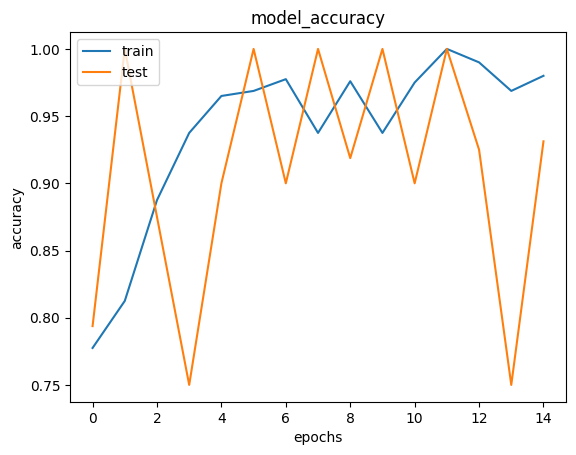

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

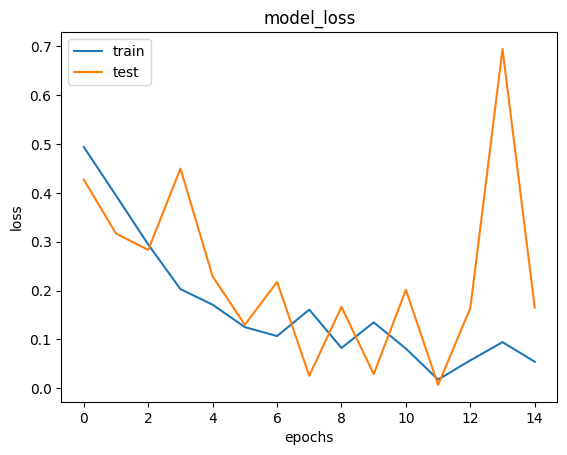

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [16]:
model_final.save('model_final.h5')

In [17]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [18]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)

    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [20]:
make_prediction("/content/drive/MyDrive/Projects/CarParkingDetect/train_data/train_data/train/occupied/roi_1.png")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'car'

In [21]:
make_prediction("/content/drive/MyDrive/Projects/CarParkingDetect/train_data/train_data/train/empty/spot122.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'car'

In [22]:

model_final.save("model_final.h5")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
